In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [4]:
votes = pd.read_csv('../assets/datasets/votes.csv', index_col=0)
votes.fillna('n', inplace=True)
votes

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,democrat,n,y,n,y,y,y,n,n,n,n,n,n,n,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,n,y
9,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
10,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,n


Next, let's define the x and y variables: 

In [5]:
X = votes[['V1',
            'V2',
            'V3',
            'V4',
            'V5',
            'V6',
            'V7',
            'V8',
            'V9',
            'V10',
            'V11',
            'V12',
            'V13',
            'V14',
            'V15',
            'V16']]

y = votes.Class.map({'democrat':1, 'republican':0})

In [6]:
for i in X:
    X[i] = X[i].map({'y':1,'n':0})

X.head()

/Users/allenbyron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
2,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
4,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
5,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [7]:
X_standard = StandardScaler().fit_transform(X)

In [8]:
#create the covariance matrix from the standardized x-values
cov_mat = np.cov(X_standard.T)
cov_mat

array([[ 1.00230415,  0.0390487 ,  0.39852965, -0.39876866, -0.34579014,
        -0.3839277 ,  0.34852066,  0.39316258,  0.29835044, -0.08243094,
         0.11277752, -0.39554734, -0.32461413, -0.34420165,  0.22041201,
         0.04178208],
       [ 0.0390487 ,  1.00230415, -0.03206322,  0.07219786,  0.13871941,
         0.14423513, -0.18752265, -0.11640995, -0.18362303, -0.09106758,
         0.21209438, -0.02518596,  0.20689251, -0.01097236, -0.1134886 ,
        -0.06281611],
       [ 0.39852965, -0.03206322,  1.00230415, -0.70307903, -0.62891934,
        -0.42649531,  0.58200314,  0.69808179,  0.55748957,  0.03150538,
         0.21382384, -0.61638291, -0.51939642, -0.55892623,  0.47481813,
         0.15910551],
       [-0.39876866,  0.07219786, -0.70307903,  1.00230415,  0.76700038,
         0.47794019, -0.54909614, -0.69360128, -0.58441675,  0.05732038,
        -0.28650904,  0.68582975,  0.56288097,  0.63562536, -0.51508594,
        -0.11060219],
       [-0.34579014,  0.13871941, -0

In [9]:
#decompose these values to find the eigenvalues and eigenvectors

In [10]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

Now, let's check the eigenvalues: 

In [11]:
eigenValues

array([ 7.102243  ,  1.44867882,  1.1998064 ,  0.88126251,  0.8248454 ,
        0.7380054 ,  0.61036665,  0.14086407,  0.54030753,  0.21188391,
        0.51431461,  0.27622346,  0.35967328,  0.31858994,  0.41340487,
        0.45639653])

And the eigenvectors: 

In [12]:
eigenVectors

array([[ 0.18803934, -0.19357121, -0.07328808, -0.51751543,  0.35845006,
         0.62089874,  0.15602045, -0.05713493,  0.07348099,  0.00747574,
         0.20525446, -0.03613906, -0.20296072,  0.07010134, -0.12290505,
        -0.04760145],
       [-0.05231849, -0.5860793 ,  0.23045319, -0.37516036,  0.12646973,
        -0.55398342,  0.10486865,  0.01855198,  0.07925709,  0.10910015,
        -0.00808044,  0.0799821 , -0.13259865, -0.0801356 ,  0.06581724,
         0.26963501],
       [ 0.29660826, -0.08013044,  0.16884543,  0.01308925,  0.10990706,
         0.03068335, -0.17958811, -0.2133564 , -0.3596669 ,  0.06665988,
         0.23464645, -0.23883742,  0.45295072, -0.56681358, -0.08181081,
         0.08418781],
       [-0.31510691,  0.1422561 , -0.07340739, -0.13936979, -0.00770719,
        -0.05450439,  0.17904898, -0.39727071,  0.25270932, -0.4526401 ,
         0.01034961, -0.55964437,  0.0780124 , -0.01205996,  0.11191782,
         0.24886662],
       [-0.33401889, -0.0385968 ,  0

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [13]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

In [14]:
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

7.10224299609
1.44867881863
1.19980639643
0.881262509772
0.824845400306
0.738005397126
0.610366646038
0.540307526332
0.5143146149
0.456396531035
0.413404865073
0.359673279653
0.31858993662
0.276223460272
0.211883908313
0.140864072849


Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [15]:
EigenSum = sum(eigenValues)

ExpVar = [(i / EigenSum)*100 for i in sorted(eigenValues, reverse=True)]

ExpVar

[44.286975004365047,
 9.0334282656153118,
 7.481551380062113,
 5.4952288684035588,
 5.1434325248950366,
 4.601930206215556,
 3.8060219020170476,
 3.3691590004030152,
 3.2070767653227987,
 2.845920897544064,
 2.5778406816338859,
 2.2427902782952178,
 1.9866096622564822,
 1.7224278988231361,
 1.3212301179310706,
 0.87837654621665684]

Now, calculate the explained variance and the Cumulative explained variance

In [16]:
CumulativeExpVar = np.cumsum(ExpVar)

print(CumulativeExpVar)

[  44.286975     53.32040327   60.80195465   66.29718352   71.44061604
   76.04254625   79.84856815   83.21772715   86.42480392   89.27072481
   91.8485655    94.09135577   96.07796544   97.80039334   99.12162345
  100.        ]


In [17]:
eigenPairs

[(7.1022429960917179,
  array([ 0.18803934, -0.05231849,  0.29660826, -0.31510691, -0.33401889,
         -0.26716267,  0.29182075,  0.32681104,  0.29287877, -0.01359228,
          0.07112483, -0.28929338, -0.27553751, -0.28769832,  0.24744034,
          0.07138452])),
 (1.4486788186332382,
  array([-0.19357121, -0.5860793 , -0.08013044,  0.1422561 , -0.0385968 ,
         -0.07972083,  0.19643052,  0.0725546 ,  0.18058669,  0.37071451,
         -0.4880378 ,  0.15955659, -0.06114016,  0.14238328, -0.0173265 ,
          0.28757258])),
 (1.1998063964339234,
  array([-0.07328808,  0.23045319,  0.16884543, -0.07340739,  0.02237429,
          0.25992991,  0.04588376,  0.07536811,  0.00924878,  0.57391342,
          0.44655414, -0.01496153,  0.14476793,  0.13711492,  0.01321806,
          0.51258496])),
 (0.88126250977163012,
  array([-0.51751543, -0.37516036,  0.01308925, -0.13936979, -0.09559165,
          0.19341153, -0.09917934, -0.00111245, -0.03611105,  0.15274865,
          0.38257418, 

In [18]:
Pmatrix = np.hstack((eigenPairs[0][1].reshape(16,1),
                      eigenPairs[1][1].reshape(16,1)))
Y = X_standard.dot(Pmatrix)
print(Y)

[[ -3.57517112e+00   4.38297594e-01]
 [ -3.69493371e+00  -8.95128380e-01]
 [ -1.71030280e+00  -2.70058387e+00]
 [ -3.13964631e-01  -2.31899467e+00]
 [ -6.78437696e-01  -2.53497808e+00]
 [ -1.20790768e+00  -1.11719861e+00]
 [ -1.89912320e+00  -5.42808861e-01]
 [ -2.95570500e+00  -6.29815093e-01]
 [ -3.54798591e+00  -3.03149053e-01]
 [  2.70347515e+00  -1.08570844e+00]
 [ -2.55071928e+00  -1.05709850e+00]
 [ -2.95301463e+00  -2.24856793e+00]
 [  1.77214703e+00  -8.17076289e-01]
 [  2.19263877e+00  -1.93269378e+00]
 [ -2.56229851e+00  -1.06036300e+00]
 [ -3.14098004e+00  -4.41290157e-01]
 [  7.60907517e-01  -1.94994111e-01]
 [  2.90921354e+00   5.27010857e-01]
 [ -3.10265281e+00  -1.22179442e+00]
 [  3.50514663e+00  -1.55587020e+00]
 [  2.91870533e+00  -1.91746519e+00]
 [  3.35550845e+00  -5.29096689e-01]
 [  3.46070985e+00   6.49384666e-01]
 [  3.35550845e+00  -5.29096689e-01]
 [  3.31376204e+00   5.74053394e-02]
 [  3.43352464e+00   1.39083131e+00]
 [  3.61034804e+00  -3.77388847e-01]
 

Now, conduct the PCA using scikit learn

In [51]:
pcask = PCA(n_components=5)
y_sk = pcask.fit_transform(X_standard)
y_sk

array([[-3.57517112, -0.43829759,  1.00870171,  0.79092281, -0.05406329],
       [-3.69493371,  0.89512838, -1.1943285 ,  0.09499978, -0.06831767],
       [-1.7103028 ,  2.70058387,  0.26750866, -0.93407272, -0.04224974],
       ..., 
       [-3.29314631,  0.15144121,  0.33695184, -0.46283127,  1.8363704 ],
       [-3.4427845 , -0.8753323 , -0.60254499,  0.34205932,  1.41479912],
       [-3.72211893,  0.15368173, -0.04647436, -0.21050478, -1.28287623]])

In [52]:
y_sk_df = pd.DataFrame(data=y_sk)

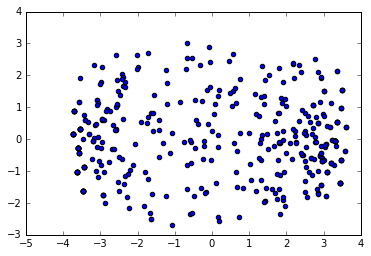

In [53]:
plt.scatter(y_sk_df[0],y_sk_df[1])
plt.show()

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
k = 5
kmeans = KMeans(n_clusters=k)

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

silhouette_score(X, labels, metric='euclidean')

0.1789757966851091

# Case #2: Airport Delays

In [54]:
airports = pd.read_csv('../assets/datasets/Airport_operations.csv', index_col=0)
airports.head()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
airport,,,,,,,,,,,,,,
ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


First, let's define the x and y variables: Airport is going to be our "x" variable

Then, standardize the x variable for analysis

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

Then, check your eigenvalues and eigenvectors:

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Next, Calculate the explained variance

Finally, conduct the PCA - use the results about to guide your selection of "n" componants